# Model Development

- anomaly detection (wait for improvement)
- customer segmentation by RFM (Done)
- market basket analysis (Done)
- customer lifetime value
- churn prediction
- demand forecasting (In progress)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="dark")
import numpy as np
from scipy import stats

In [2]:
df = pd.read_parquet("./data/cleaned_data.parquet")
print(f"data shape: {df.shape}")
df.head()

data shape: (541909, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Step 1: Remove Defective Data and Ouliers

In [3]:
defect_index = df[(df['Quantity'] < 0) & (df['UnitPrice'] == 0)].index
df = df.drop(index=defect_index)
print(f"datashape: {df.shape}")
df.head()

datashape: (540573, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [4]:
df = df.reset_index(drop=True)
print(f"data shape: {df.shape}")
df.head()

data shape: (540573, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


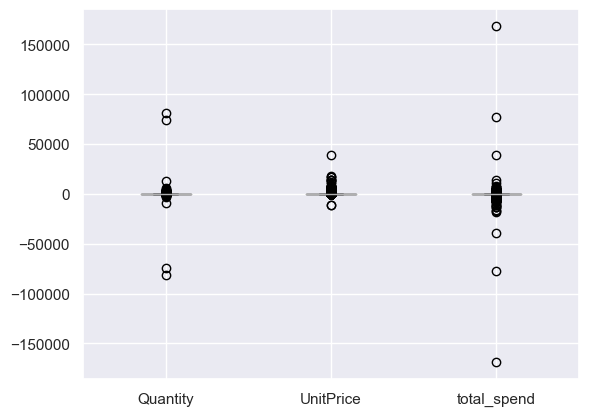

In [5]:
df.drop(columns=['CustomerID']).boxplot()
plt.show()

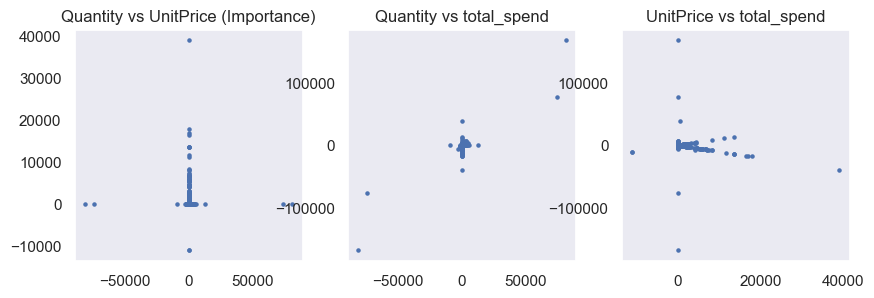

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].scatter(x=df['Quantity'], y=df['UnitPrice'], s=5)
ax[0].title.set_text('Quantity vs UnitPrice (Importance)')
ax[1].scatter(x=df['Quantity'], y=df['total_spend'], s=5)
ax[1].title.set_text('Quantity vs total_spend')
ax[2].scatter(x=df['UnitPrice'], y=df['total_spend'], s=5)
ax[2].title.set_text('UnitPrice vs total_spend')
plt.show()

In [7]:
# IQR method for Quantity column
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Quantity']>=upper)[0]
lower_array = np.where(df['Quantity']<=lower)[0]

# Removing the outliers
df = df.drop(index=upper_array)
df = df.drop(index=lower_array)

In [8]:
# Z-score method for UnitPrice column
z = np.abs(stats.zscore(df['UnitPrice'])) 
threshold = 3
outliers = np.where(z > threshold)

# DataFrame with no oulier
df = df[(z < threshold)]

In [9]:
print(df.shape)
df.head()

(482515, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


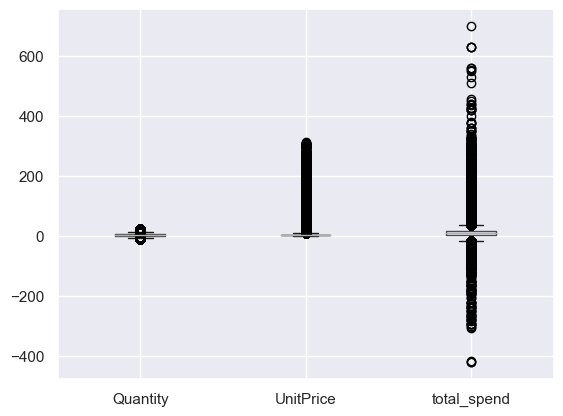

In [10]:
df.drop(columns=['CustomerID']).boxplot()
plt.show()

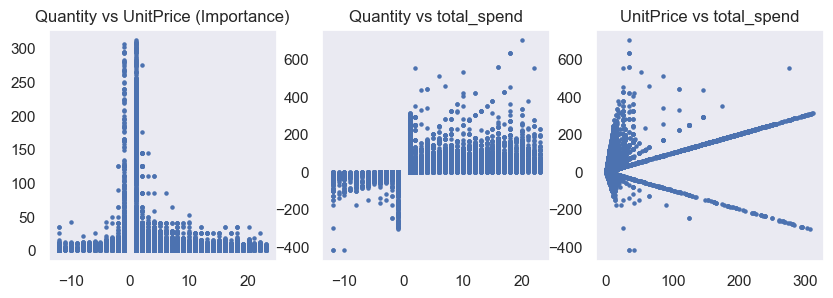

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].scatter(x=df['Quantity'], y=df['UnitPrice'], s=5)
ax[0].title.set_text('Quantity vs UnitPrice (Importance)')
ax[1].scatter(x=df['Quantity'], y=df['total_spend'], s=5)
ax[1].title.set_text('Quantity vs total_spend')
ax[2].scatter(x=df['UnitPrice'], y=df['total_spend'], s=5)
ax[2].title.set_text('UnitPrice vs total_spend')
plt.show()

## Step 2: ML

In [12]:
df = df.reset_index(drop=True)
sample = df.copy()
print(sample.shape)
sample.head()

(482515, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### Anomaly Detection with Isolation Forest

In [14]:
from sklearn.ensemble import IsolationForest
X = sample[['Quantity', 'UnitPrice', 'total_spend']]
if_detector = IsolationForest(n_estimators=100, contamination=0.0001).fit(X)
if_detect = if_detector.predict(X)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [15]:
if_detect.shape
print(if_detect.sum())

482513


In [16]:
color_map = {1: 'royalblue', -1: 'crimson'}

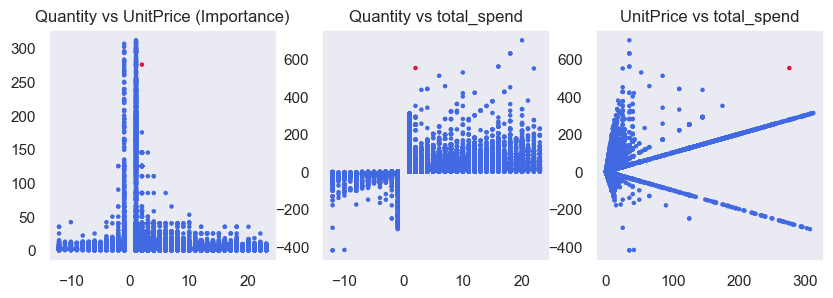

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].scatter(x=df['Quantity'], y=df['UnitPrice'], s=5, c=pd.Series(if_detect).map(color_map))
ax[0].title.set_text('Quantity vs UnitPrice (Importance)')
ax[1].scatter(x=df['Quantity'], y=df['total_spend'], s=5, c=pd.Series(if_detect).map(color_map))
ax[1].title.set_text('Quantity vs total_spend')
ax[2].scatter(x=df['UnitPrice'], y=df['total_spend'], s=5, c=pd.Series(if_detect).map(color_map))
ax[2].title.set_text('UnitPrice vs total_spend')
plt.show()

In [18]:
df.iloc[np.where(if_detect == -1)[0], :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
96244,545336,M,Manual,2,2011-03-01 16:53:00,275.6,12428,Finland,551.2


In [19]:
df[df['CustomerID'] == 12980]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
29705,539144,84078A,SET/4 WHITE RETRO STORAGE CUBES,16,2010-12-16 11:36:00,34.95,12980,United Kingdom,559.20
49051,540908,84078A,SET/4 WHITE RETRO STORAGE CUBES,16,2011-01-12 11:53:00,34.95,12980,United Kingdom,559.20
79024,543650,84078A,SET/4 WHITE RETRO STORAGE CUBES,20,2011-02-11 09:17:00,34.95,12980,United Kingdom,699.00
89309,544689,84078A,SET/4 WHITE RETRO STORAGE CUBES,6,2011-02-23 08:46:00,34.95,12980,United Kingdom,209.70
169204,553102,84078A,SET/4 WHITE RETRO STORAGE CUBES,18,2011-05-13 11:58:00,34.95,12980,United Kingdom,629.10
190569,555513,84078A,SET/4 WHITE RETRO STORAGE CUBES,18,2011-06-05 10:38:00,34.95,12980,United Kingdom,629.10
198454,C556277,82001S,VINYL RECORD FRAME SILVER,-1,2011-06-09 19:52:00,3.39,12980,United Kingdom,-3.39
198455,C556277,84078A,SET/4 WHITE RETRO STORAGE CUBES,-2,2011-06-09 19:52:00,34.95,12980,United Kingdom,-69.90
227079,C559252,84078A,SET/4 WHITE RETRO STORAGE CUBES,-4,2011-07-07 11:42:00,34.95,12980,United Kingdom,-139.80


In [20]:
raw_df = pd.read_parquet("./data/cleaned_data.parquet")
X_test = raw_df[['Quantity', 'UnitPrice', 'total_spend']]
anomaly_predict = if_detector.predict(X_test)

In [21]:
raw_df.iloc[np.where(anomaly_predict == -1)[0]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,0,United Kingdom,569.77
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,0,United Kingdom,607.49
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,0,United Kingdom,498.47
6165,536876,DOT,DOTCOM POSTAGE,1,2010-12-03 11:36:00,887.52,0,United Kingdom,887.52
10812,537237,DOT,DOTCOM POSTAGE,1,2010-12-06 09:58:00,863.74,0,United Kingdom,863.74
...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,0,United Kingdom,1008.96
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,0,United Kingdom,1683.75
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,0,United Kingdom,938.59
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,0,United Kingdom,933.17


In [22]:
raw_df[raw_df['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,1.25
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,18.95
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,0,United Kingdom,2.55
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom,1.70
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom,5.04
...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom,5.00
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom,-125.00
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,-9.95
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,1.26


### Customer Segmentation by RFM

- R: Recency - diff date of the most recent purchase for each customer
- F: Frequency - total number of purchases for each customer
- M: Monetary - total money spent by each customer
- etc. should be included

In [29]:
sample = df.copy()
anonymous_customer_index = sample[sample['CustomerID'] == 0].index
sample = sample.drop(index=anonymous_customer_index)
sample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [30]:
freq = sample.groupby(['CustomerID'])['InvoiceNo'].nunique().reset_index().rename({'InvoiceNo': 'frequency'}, axis=1)
# sample[sample['CustomerID'] == 12349].groupby("CustomerID")['InvoiceNo'].value_counts()
freq.head()

,CustomerID,frequency
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,10


In [31]:
monetary = sample.groupby('CustomerID')["total_spend"].sum().reset_index().rename({'total_spend': 'monetary'}, axis=1)
monetary.head()

,CustomerID,monetary
0,12347,3097.82
1,12348,377.00
2,12349,1626.15
3,12350,314.00
4,12352,1545.41


commented lines are used for testing and inspecting the processes

In [32]:
# sample[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates('InvoiceNo').loc[sample['CustomerID'] == 18283]
# sample.loc[sample['CustomerID'] == 18283].groupby('CustomerID')['InvoiceNo'].value_counts()
# sample.groupby('CustomerID')['InvoiceNo'].nunique()

# unique_invoice = unique invoice both No. and Date
unique_invoice = sample[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates(['InvoiceNo'])
unique_invoice['recency'] = unique_invoice.groupby('CustomerID')['InvoiceDate'].diff().dt.days
# unique_invoice
# unique_invoice.loc[unique_invoice['CustomerID'] == 15804]
# unique_invoice.loc[unique_invoice['CustomerID'] == 17850]

# latest_index = unique_invoice.groupby(['CustomerID'])['InvoiceDate'].max().index
# unique_invoice.iloc[latest_index, :]
# recency = unique_invoice.iloc[latest_index, :][['CustomerID', 'recency']]
recency = unique_invoice.drop_duplicates("CustomerID", keep='last')
# NaN occured for one time purchase
# sample.loc[sample['CustomerID'] == 17301]['InvoiceDate'].nunique()
recency = recency.drop(columns=['InvoiceNo', 'InvoiceDate'])
pd.options.mode.chained_assignment = None  # default='warn'
recency.loc[recency['recency'].isnull() , 'one_time_purchase'] = int(1)
recency['one_time_purchase'] = recency['one_time_purchase'].fillna(0)
recency['one_time_purchase'] = recency['one_time_purchase'].astype(int)
recency['recency'] = recency['recency'].fillna(999)
recency['recency'] = recency['recency'].astype(int)
recency.head()

,CustomerID,recency,one_time_purchase
125,18074,999,1
185,13747,999,1
300,12791,999,1
380,17908,999,1
580,16583,999,1


In [33]:
customer_profile = recency.merge(freq, on='CustomerID').merge(monetary, on='CustomerID')
# customer_profile = pd.merge(freq, monetary, how='left', on='CustomerID')
# customer_profile = pd.merge(customer_profile, recency, how='left', on='CustomerID')
customer_profile.head()

,CustomerID,recency,one_time_purchase,frequency,monetary
0,18074,999,1,1,298.40
1,13747,999,1,1,79.60
2,12791,999,1,1,15.00
3,17908,999,1,1,234.52
4,16583,999,1,1,233.45


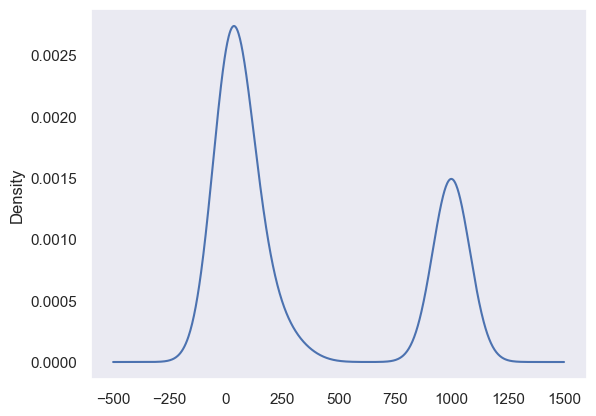

           recency  one_time_purchase    frequency      monetary
count  4248.000000        4248.000000  4248.000000   4248.000000
mean    348.568738           0.307910     4.765772   1050.577871
std     438.150385           0.461683     8.578505   2332.284637
min       0.000000           0.000000     1.000000   -284.590000
25%      15.000000           0.000000     1.000000    209.047500
50%      73.000000           0.000000     2.000000    487.360000
75%     999.000000           1.000000     5.000000   1142.312500
max     999.000000           1.000000   239.000000  92507.870000
recency median: 73.0 -> can be used to decide churn?


In [34]:
customer_profile['recency'].plot(kind='kde')
plt.show()
print(customer_profile.drop(columns=['CustomerID']).describe())
print(f"recency median: {customer_profile['recency'].median()} -> can be used to decide churn?")

More Feature Engineering to customer_profile
- mean time between purchases
- mean ticket size (AVG spent per trasaction)
- total unique item per purchase
- total quantity per purchase
- mean spent per month
- freq per month
- refund times

In [35]:
# mean time interval
mean_time_interval = unique_invoice.groupby('CustomerID').agg({"recency": lambda x: x.diff().abs().mean()}).reset_index()
mean_time_interval = mean_time_interval.rename(columns={'recency': 'mean_time_interval'})
mean_time_interval['mean_time_interval'] = mean_time_interval['mean_time_interval'].apply(lambda x: round(x, 2))
mean_time_interval['mean_time_interval'] = mean_time_interval['mean_time_interval'].fillna(-1)
mean_time_interval.head()

,CustomerID,mean_time_interval
0,12347,25.60
1,12348,67.00
2,12349,-1.00
3,12350,-1.00
4,12352,53.25


In [36]:
mean_per_purchase = sample.groupby(['CustomerID', 'InvoiceNo'])\
                              .agg({"total_spend": "sum",
                                  "Quantity": "sum",
                                  "StockCode": "nunique"})\
                              .groupby('CustomerID')\
                              .agg({"total_spend": "mean",
                                  "Quantity": "mean",
                                  "StockCode": "mean"})\
                              .reset_index()\
                              .rename(columns={'total_spend': 'mean_ticket_size',
                                             "Quantity": "mean_quantity",
                                             "StockCode": "mean_unique_item"})\
                              .round(2)
mean_per_purchase.head()

,CustomerID,mean_ticket_size,mean_quantity,mean_unique_item
0,12347,442.55,185.71,21.00
1,12348,94.25,7.25,1.25
2,12349,1626.15,485.00,68.00
3,12350,314.00,173.00,16.00
4,12352,154.54,47.00,9.10


In [37]:
per_period = sample[['CustomerID', 'InvoiceNo', 'StockCode', 'InvoiceDate', 'total_spend']]
per_period['month'] = per_period['InvoiceDate'].dt.month
per_period['week'] = per_period['InvoiceDate'].dt.isocalendar().week

per_month = per_period.groupby(['CustomerID', 'month'])\
                        .agg({"InvoiceNo": "nunique", "total_spend": "mean"})\
                        .groupby(['CustomerID'])\
                        .agg({"InvoiceNo": "mean", "total_spend": "mean"})\
                        .round(2)\
                        .reset_index()\
                        .rename(columns={'InvoiceNo': 'freq_per_month', 'total_spend': 'mean_spent_per_month'})

per_month.head()

,CustomerID,freq_per_month,mean_spent_per_month
0,12347,1.17,20.91
1,12348,1.00,87.12
2,12349,1.00,23.91
3,12350,1.00,19.62
4,12352,2.50,17.54


integrate features

In [38]:
rfm = customer_profile.merge(mean_time_interval, on='CustomerID')\
                        .merge(mean_per_purchase, on='CustomerID')\
                        .merge(per_month, on='CustomerID')
rfm.head()

,CustomerID,recency,one_time_purchase,frequency,monetary,mean_time_interval,mean_ticket_size,mean_quantity,mean_unique_item,freq_per_month,mean_spent_per_month
0,18074,999,1,1,298.40,-1.0,298.40,62.0,10.0,1.0,29.84
1,13747,999,1,1,79.60,-1.0,79.60,8.0,1.0,1.0,79.60
2,12791,999,1,1,15.00,-1.0,15.00,1.0,1.0,1.0,15.00
3,17908,999,1,1,234.52,-1.0,234.52,121.0,49.0,1.0,4.19
4,16583,999,1,1,233.45,-1.0,233.45,111.0,14.0,1.0,16.68


Kmeans

check outliers

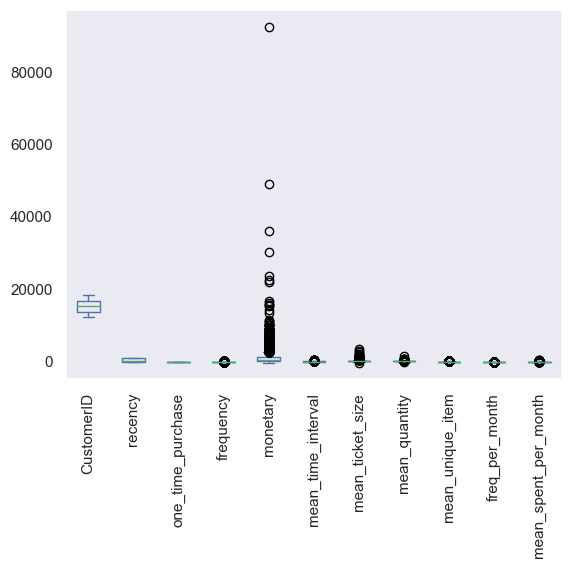

In [39]:
rfm.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

choose k

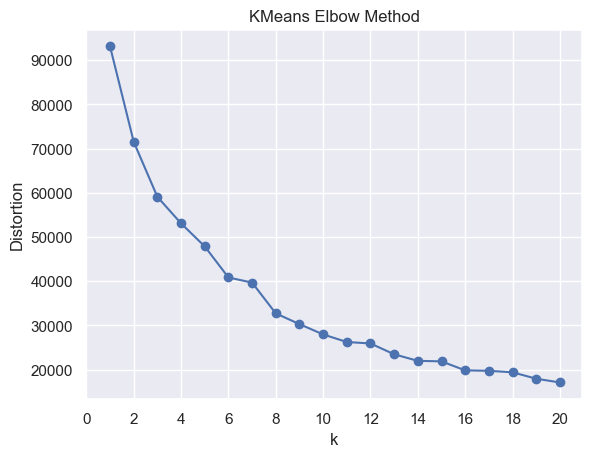

In [40]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
rfm_scaled = scaler.fit_transform(rfm.drop(columns=['CustomerID']))
rfm_scaled = pd.DataFrame(rfm_scaled, columns=rfm.drop(columns=['CustomerID']).columns)
# rfm_scaled['CustomerID'] = rfm['CustomerID']
rfm_scaled.head()

from sklearn.cluster import KMeans

distortion = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init='auto')
    kmeans.fit(rfm_scaled)
    distortion.append(kmeans.inertia_)
plt.plot(range(1, 21), distortion, marker='o')
plt.xticks(range(0, 22, 2))
plt.grid()
plt.title("KMeans Elbow Method")
plt.ylabel("Distortion")
plt.xlabel("k")
plt.show()

choose k with silhouette score

For k = 4, The average silhouette_score is : 0.29059646763653674
For k = 6, The average silhouette_score is : 0.23795440019502925
For k = 8, The average silhouette_score is : 0.2280982509451372
For k = 10, The average silhouette_score is : 0.2159069868671042


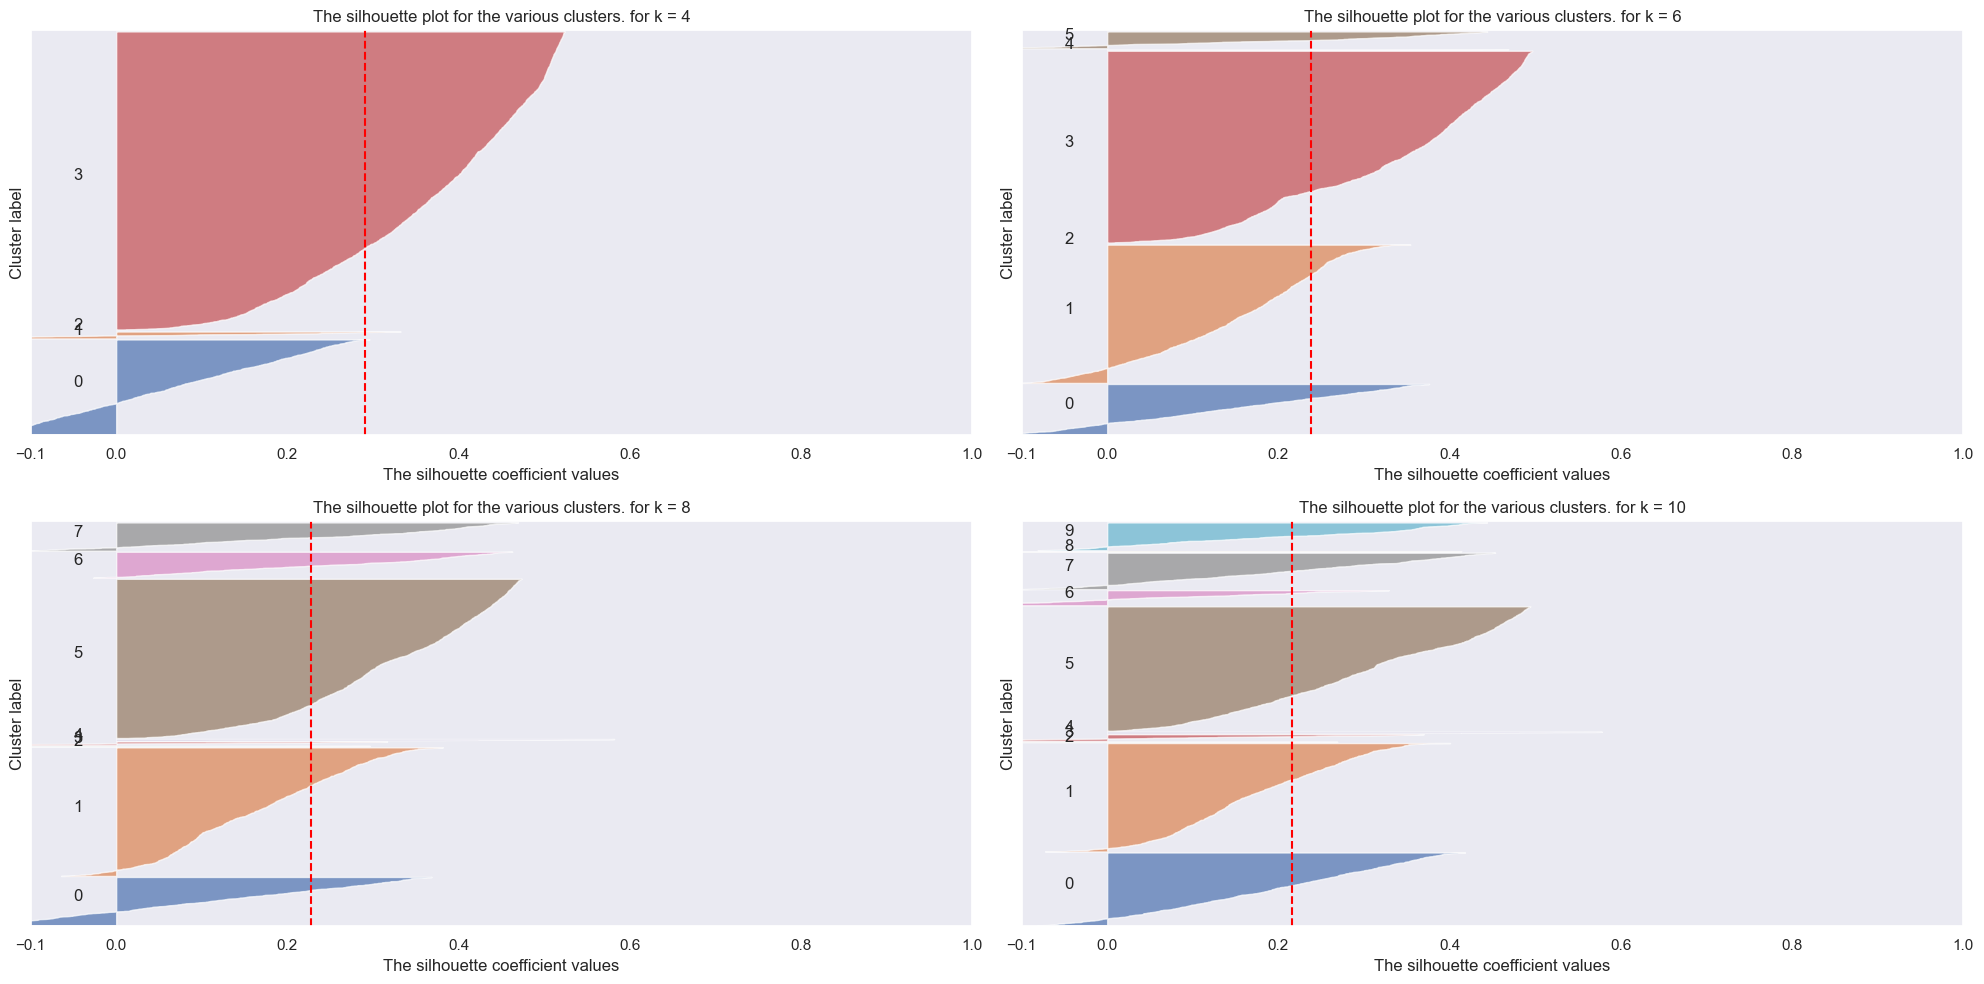

In [41]:
from sklearn.metrics import silhouette_score, silhouette_samples

K = [4, 6, 8, 10]

# Create a subplot with 3 row and 2 columns
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20, 10)

for k, each_plot in zip(K, ax.flatten()):
    each_plot.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    each_plot.set_ylim([0, len(rfm_scaled) + (k + 1) * 10])

    # Initialize the clusterer with k value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(rfm_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print(f"For k = {k}, The average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rfm_scaled, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        each_plot.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        each_plot.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    each_plot.set_title(f"The silhouette plot for the various clusters. for k = {k}")
    each_plot.set_xlabel("The silhouette coefficient values")
    each_plot.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    each_plot.axvline(x=silhouette_avg, color="red", linestyle="--")

    each_plot.set_yticks([])  # Clear the yaxis labels / ticks
    each_plot.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# adjust layout
fig.tight_layout()
plt.show()

from both plots, k=6 and 10 are the best. we're gonna choose 10.

assign segments to customers

In [42]:
km = KMeans(n_clusters=10, n_init="auto", init="k-means++").fit(rfm_scaled)
rfm['cluster'] = km.labels_

In [43]:
rfm.head()

,CustomerID,recency,one_time_purchase,frequency,monetary,mean_time_interval,mean_ticket_size,mean_quantity,mean_unique_item,freq_per_month,mean_spent_per_month,cluster
0,18074,999,1,1,298.40,-1.0,298.40,62.0,10.0,1.0,29.84,0
1,13747,999,1,1,79.60,-1.0,79.60,8.0,1.0,1.0,79.60,8
2,12791,999,1,1,15.00,-1.0,15.00,1.0,1.0,1.0,15.00,0
3,17908,999,1,1,234.52,-1.0,234.52,121.0,49.0,1.0,4.19,0
4,16583,999,1,1,233.45,-1.0,233.45,111.0,14.0,1.0,16.68,0


In [44]:
rfm['cluster'].value_counts()

0    1683
9    1284
4     481
6     374
2     263
8     125
1      22
5      13
7       2
3       1
Name: cluster, dtype: int64

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [46]:
X = rfm.drop(columns=['cluster'])
y = rfm['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeClassifier()
params_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": [4, 5],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3]
}

search = RandomizedSearchCV(
    model,
    param_distributions=params_dist,
    cv=5,
    scoring="accuracy",
    verbose=1,
    random_state=0
)


search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4]},
                   random_state=0, scoring='accuracy', verbose=1)

In [47]:
print(search.best_params_)
tuned_model = DecisionTreeClassifier(**search.best_params_)
tuned_model.fit(X_train, y_train)

{'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4)

In [53]:
prediction = tuned_model.predict(X_test)
train_prediction = tuned_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_test, prediction).round(4)}")
print(f"Accuracy on train set: {accuracy_score(y_train, train_prediction).round(4)}")
print(f"Classification Report: \n{classification_report(y_test, prediction)}")

Accuracy: 0.9329
Accuracy on train set: 0.9397
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       331
           1       1.00      0.50      0.67         4
           2       0.88      0.78      0.82        54
           4       0.96      0.83      0.89       103
           5       1.00      0.67      0.80         3
           6       0.94      0.99      0.96        79
           8       0.95      0.78      0.86        27
           9       0.91      0.96      0.93       249

    accuracy                           0.93       850
   macro avg       0.95      0.81      0.86       850
weighted avg       0.93      0.93      0.93       850



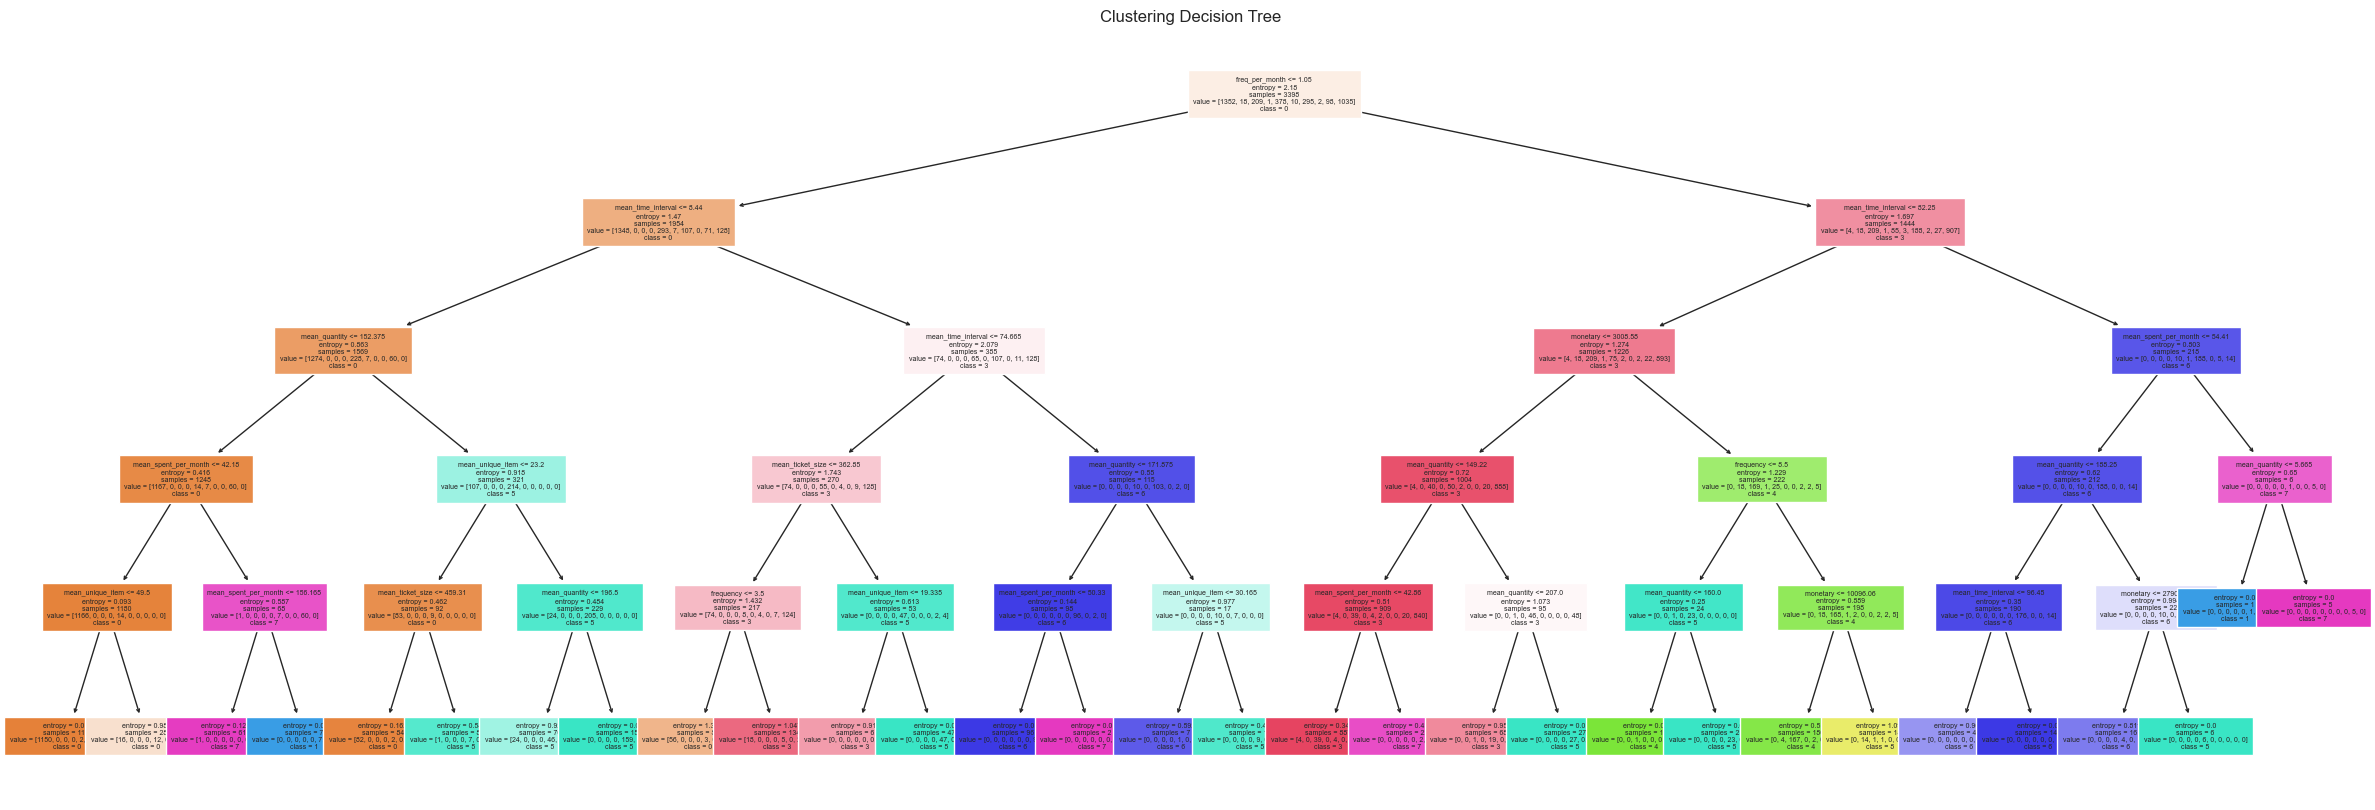

In [54]:
fig = plt.figure(figsize=(30, 10))
plot_tree(tuned_model, 
          filled=True, 
          feature_names=X.columns.tolist(), 
          class_names=y.astype(str).unique(),
          fontsize=5)
plt.title("Clustering Decision Tree")
plt.show()

### Market Basket Analysis

- 'M' or 'manual' must be dropped first
- some meaning less or unsure stockcode and description will be dropped
- some description that unrelated to items will be dropped
- remove cancelled orders

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [13]:
market = sample[(~sample['StockCode'].isin(['DOT', 'POST', 'M', 'BANK CHARGES', 'D', 'CRUK', 'B', 'S'])) & ~(sample['total_spend'] < 0)]

In [14]:
basket = market.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
# basket.head()

In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
# encode the data wo remove quantity information
basket_encoded = basket.applymap(encode_units)

# filter only trasaction with more than 2 unique items
basket_encoded_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]

In [26]:
frequent_itemsets = apriori(basket_encoded_filtered, min_support=0.03, use_colnames=True).sort_values(by='support', ascending=False).reset_index(drop=True)
frequent_itemsets['nunique_items'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
rules_result = association_rules(frequent_itemsets, metric='lift', min_threshold=1).sort_values(by='lift', ascending=False).reset_index(drop=True)
rules_important_metrics = rules_result[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [27]:
rules_important_metrics.head(20)

,antecedents,consequents,support,confidence,lift
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.034121,0.828530,15.045681
1,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.034121,0.619612,15.045681
2,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.031806,0.564805,13.714834
3,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.031806,0.772334,13.714834
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.040945,0.743534,13.203417
5,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.040945,0.727081,13.203417
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.036138,0.602970,10.821358
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.036138,0.648562,10.821358
8,(LUNCH BAG BLACK SKULL.),(LUNCH BAG PINK POLKADOT),0.030560,0.425620,6.896678
9,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.030560,0.495192,6.896678


### Demand forecasting